## Regulation of ion transport from within ion transit pathways
-------------

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
from scipy.integrate import odeint
sns.set()
%matplotlib inline

### Detail

<img src = "img/hill2019.png" height=500px width=500px> <img>

In [17]:
Ni = 100*1e-3
Ci = 2*1e-6
F_3n = Ni**2.5/(Ni**2.5 + 17**2.5)
K_con1 = 0.1*1e-6
K_con2 = 20
K_coff1 = 0.05*1e-6
K_coff2 = 0.3
K_12 = 0.2
K_43 = 0.1
K_inact1 = 0.2
K_inact2 = 25*K_inact1

In [18]:
k = {"Ni": Ni,"Ci":Ci, "F_3n": F_3n,\
     "K_con1": K_con1,"K_con2":K_con2,\
     "K_coff1":K_coff1,"K_coff2": K_coff2,\
     "K_12": K_12,"K_43":K_43,"K_inact1": K_inact1,\
     "K_inact2": K_inact2}

In [19]:
k

{'Ni': 0.1,
 'Ci': 2e-06,
 'F_3n': 2.6538510499533897e-06,
 'K_con1': 1e-07,
 'K_con2': 20,
 'K_coff1': 5e-08,
 'K_coff2': 0.3,
 'K_12': 0.2,
 'K_43': 0.1,
 'K_inact1': 0.2,
 'K_inact2': 5.0}

#### Differential Equations

$F_{3n} = \frac{Ni^{2.5}}{Ni^{2.5} + 17^{2.5}}$

$\frac{dF_{1}}{dt} = F_4C_iK_{con1} - F_{1}K_{coff1} + F_{2}F_{3n} K_{inact1} - F_1K_{12}$

$\frac{dF_{2}}{dt} = F_3 C_i K_{con2} - F_{2} K_{con2} + F_{1} K_{12} - F_{2} F_{3n} K_{inact1}$

$\frac{dF_{3}}{dt} = F_2 K_{coff2} + F_{4} K_{43} - F_{3}C_{i}K_{con2} - F_{3}F_{3n}K_{inact2}$

$F_{4} = 1 - F_{1} -F_{2} - F_{3}$

#### Reduced Equation

$\frac{dF_{1}}{dt} = C_iK_{con1} - F_{1}(K_{coff1}+C_iK_{con1} + K_{12}) + F_{2}(F_{3n} K_{inact1}- C_iK_{con1}) - F_{3}C_iK_{con1}$


$\frac{dF_{2}}{dt} = F_{1} K_{12} - F_{2} (K_{con2}+F_{3n} K_{inact1})+ F_3 C_i K_{con2}$

$\frac{dF_{3}}{dt} =  K_{43} - F_{1}K_{43} + F_2 (K_{coff2} - K_{43}) - F_{3}(C_{i}K_{con2} + F_{3n}K_{inact2} + K_{43}) $

### Calculation

In [22]:
# function that returns dy/dt
def model(y,t,k):
    
    '''y[0] = F1,
       y[1] = F2,
       y[2] = F3,
    '''
    
    dy1dt = k["Ci"]*k["K_con1"] \
           - y[0]*(k["K_coff1"]+k["Ci"]*k["K_con1"]+k["K_12"])\
           + y[1]*(k["F_3n"]*k["K_inact1"]-k["Ci"]*k["K_con1"])\
           - y[2]*k["Ci"]*k["K_con1"]
    
    dy2dt = y[0]*k["K_12"] \
           -y[1]*(k["K_con2"]+k["F_3n"]*k["K_inact1"])\
           +y[2]*k["Ci"]*k["K_con2"]
    
    dy3dt = k["K_43"]\
           -y[0]*k["K_43"]\
           +y[1]*(k["K_coff2"]-k["K_43"])\
           -y[2]*(k["Ci"]*k["K_con2"]+k["F_3n"]*k["K_inact2"]+k["K_43"])
    
    dydt = [dy1dt,dy2dt,dy3dt]
    return dydt

In [27]:

N = 1
T = 50
y0 = [1,0,0]
t = np.linspace(0,T)

'''solve ODEs'''
y = odeint(model,y0,t,args=(k,))

y1 = np.empty_like(t)
y2 = np.empty_like(t)
y3 = np.empty_like(t)
y4 = np.empty_like(t)

for i in range(len(t)):
    y1[i] = y[i][0]
    y2[i] = y[i][1]
    y3[i] = y[i][2]
    y4[i] = 1 - y1[i] - y2[i] - y3[i] 

In [28]:
y1[T-1],y2[T-1],y3[T-1],y4[T-1]

(4.5400406904993314e-05,
 2.431000206718904e-06,
 0.986210907074657,
 0.013741261518231296)

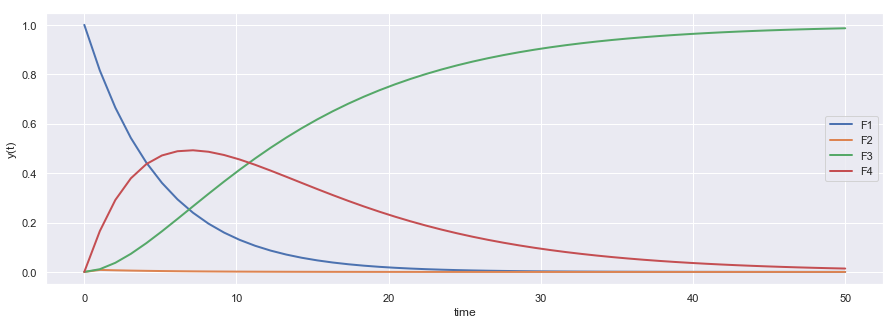

In [29]:
# plot results
plt.figure(figsize = [15,5])
plt.plot(t,y1,linewidth=2,label='F1')
plt.plot(t,y2,linewidth=2,label='F2')
plt.plot(t,y3,linewidth=2,label='F3')
plt.plot(t,y4,linewidth=2,label='F4')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

### Simulation

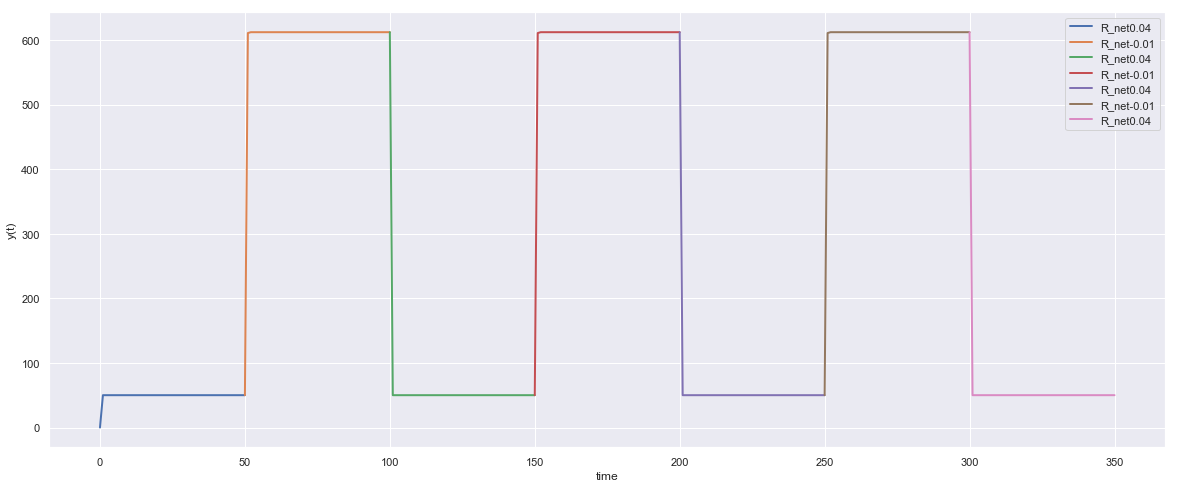

In [112]:
plt.figure(figsize = [20,8])
KEM = [40e-3,-10e-3,40e-3,-10e-3,40e-3,-10e-3,40e-3]
y0 = [0,0,1]
for kem,T in zip(KEM,[0,50,100,150,200,250,300,350]):
        K_em = kem
        K_mn = 28e-3
        K_con = 10e3
        K_coff = 28e3
        K_c = 5e3
        K_n = 10e3
        C_0 = 50e-3
        C_i = 0.01e-3
        N_0 = 0.1e-3
        N_i = 140e-3
        F_ni = N_i/(N_i+K_mn)
        F_no = N_0/(N_0+K_mn)
        k1 = K_c; k2 = K_c; k3 = K_coff;
        k4 = C_0*K_con*(1-F_no)**3; 
        k5 = (K_n*F_no**3)/K_em; 
        k6 = (K_n*F_ni**3)*K_em;
        k7 = C_i*K_con*(1-F_ni)**3;
        k8 = K_coff
        
        k = {'k1':k1,'k2':k2,'k3':k3,\
             'k4':k4,'k5':k5,'k6':k6,\
             'k7':k7,'k8':k8}

        '''solve ODEs'''
        t = np.linspace(T,T+50)
        y = odeint(model,y0,t,args=(k,))
        y1 = np.empty_like(t)
        y2 = np.empty_like(t)
        y3 = np.empty_like(t)
        y4 = np.empty_like(t)
        R_net = np.empty_like(t)
        for i in range(len(t)):
            y1[i] = y[i][0]
            y2[i] = y[i][1]
            y3[i] = y[i][2]
            y4[i] = 1 - y1[i] - y2[i] - y3[i] 
        R_net = abs(y1*k1 - y2*k2)
        
        y0 = [y1[50-1],y2[50-1],y3[50-1]]
        
        '''Plot the simulation'''
        plt.plot(t,R_net,linewidth=2,label='R_net'+str(kem))
        #plt.plot(t,y1,linewidth=2,label='y1'+str(kem))
        #plt.plot(t,y2,linewidth=2,label='y2'+str(kem))
        plt.xlabel('time')
        plt.ylabel('y(t)')
        plt.legend()
plt.show()

#### Analytical Solution

In [8]:
x1 = k2*k4*(k7+k6)+k5*k7*(k2+k3)
x2 = k1*k7*(k4+k5)+k4*k6*(k1+k8)
x3 = k1*k3*(k7+k6)+k8*k6*(k2+k3)
x4 = k2*k8*(k4+k5)+k3*k5*(k1+k8)

In [9]:
x1,x2,x3,x4

(1.940105102593134, 4.374711827520394, 1361129.6283434846, 4260313.021776008)

In [10]:
s = x1+x2+x3+x4
E1 = x1/s
E2 = x2/s
E3 = x3/s
E4 = x4/s
E1,E2,E3,E4

(3.4512544980741915e-07,
 7.782178322364029e-07,
 0.24213145700218566,
 0.7578674196545323)